## Neural Network

In [22]:
import numpy as np
import scipy as sc
import matplotlib.pyplot as plt

from sklearn.datasets import make_circles

### Crear Datasets

In [23]:
n = 500 #numero de registros
p = 2 #numero de variables

# factor muestra que tan alejados estan un circulo del otro
# noise indica el ruido que se esta agregado a nuestros datos
x, y = make_circles(n_samples=n,factor=0.5, noise = 0.05) 

print(x)

[[-2.21608188e-01 -1.01588505e+00]
 [ 3.26356524e-01  3.81774615e-01]
 [ 5.84773752e-01 -7.98591452e-01]
 [-5.73129566e-01  7.85228117e-01]
 [ 3.83233718e-02 -9.27566646e-01]
 [-4.74065304e-01 -9.08995884e-01]
 [-5.12531637e-01  8.86228086e-01]
 [-6.76526851e-01  7.22812284e-01]
 [ 9.69016160e-01 -3.90504495e-01]
 [ 2.34351377e-01  4.74754067e-01]
 [ 8.21704154e-01  4.04056255e-01]
 [-5.66776079e-01 -8.12471469e-01]
 [-4.64545830e-01 -8.92190408e-01]
 [ 5.27203652e-01 -1.51216173e-01]
 [ 5.32326466e-01 -2.25041434e-01]
 [-8.28445459e-01 -5.55560940e-01]
 [ 9.72085186e-01 -1.30862098e-01]
 [-8.59171463e-02  8.81919261e-01]
 [-7.15569777e-02  4.49027736e-01]
 [-7.73357362e-01  5.77490485e-01]
 [-8.78056240e-01  2.34905482e-01]
 [-3.42824838e-01 -3.59988517e-01]
 [-3.81206225e-01 -2.75803828e-01]
 [ 3.76927715e-01 -8.60255062e-01]
 [-6.25415854e-01 -8.36853146e-01]
 [-2.48056633e-01 -3.83613728e-01]
 [-3.97035026e-01  3.09679426e-01]
 [ 9.29486887e-01  3.46065733e-01]
 [ 5.39807454e-01  7

In [24]:
print(y)

[0 1 0 0 0 0 0 0 0 1 0 0 0 1 1 0 0 0 1 0 0 1 1 0 0 1 1 0 1 1 0 1 0 1 0 0 1
 1 0 1 1 0 1 0 0 0 0 0 1 1 0 0 1 0 0 1 1 0 0 1 0 1 1 1 0 1 1 0 1 0 1 1 0 0
 1 1 0 0 1 1 1 1 1 1 1 0 0 1 1 0 1 1 0 0 0 1 0 1 1 1 0 0 1 0 0 0 1 1 1 1 0
 0 1 0 0 1 0 1 1 1 0 1 0 1 0 1 0 0 1 0 0 0 0 0 0 0 0 1 1 1 1 0 1 0 1 1 0 1
 0 1 1 1 1 1 0 0 1 0 1 0 0 0 0 1 1 1 0 0 1 1 1 1 1 0 0 0 1 0 1 1 1 0 0 0 0
 1 1 1 0 0 0 1 1 1 1 1 0 0 1 1 0 0 1 1 1 0 0 0 0 0 0 1 0 1 1 0 0 1 0 1 0 1
 1 1 1 1 1 0 1 1 0 1 0 0 0 0 0 0 0 1 0 0 1 1 1 0 0 1 0 0 1 1 0 1 1 0 0 1 0
 1 1 1 1 1 0 1 0 0 1 0 0 1 0 1 1 0 1 0 1 1 1 0 0 1 0 1 0 0 1 0 1 0 0 0 1 0
 0 0 0 0 1 1 0 0 1 1 0 1 1 0 0 0 1 1 1 0 0 1 0 0 0 0 1 1 1 0 0 1 1 0 0 1 0
 1 1 1 0 1 0 1 0 0 0 1 1 1 1 0 1 0 0 0 1 0 1 0 1 0 1 1 1 0 0 0 1 1 0 1 0 1
 0 1 1 1 1 1 1 1 1 0 0 1 0 1 1 1 0 1 1 0 1 0 0 1 1 0 0 0 0 0 1 0 1 0 0 1 0
 1 0 1 0 1 0 0 0 0 1 1 0 0 0 1 1 0 1 0 1 1 1 1 1 1 1 0 1 1 0 1 0 1 0 1 1 1
 0 1 0 1 1 1 0 0 0 0 1 0 1 0 1 1 1 1 1 1 0 0 1 0 0 0 1 0 0 0 0 1 0 1 0 0 0
 1 1 0 1 0 0 0 1 1 1 1 1 

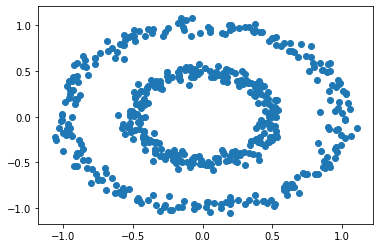

In [25]:
plt.scatter(x[:,0],x[:,1])
plt.show()

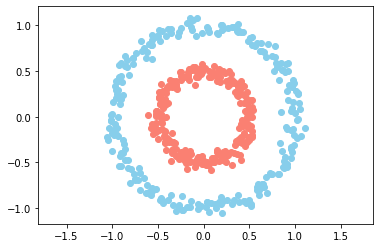

In [26]:
# Mostrar solo si y = 0
plt.scatter(x[y == 0,0],x[y == 0,1], c = "skyblue")
# Mostrar solo si y = 1
plt.scatter(x[y == 1,0],x[y == 1,1], c = "salmon")
plt.axis("equal") #visualiza los ejes con la misma proporción
plt.show()

### Crear Clase de la Capa de la Red

In [37]:
class neural_layer():
    #n_conn:numero de conexiones que entran en nuestra capa de la capa anterior
    #n_neur: numero de neuronas en la capa
    #act_f:funcion de activacion para las neuronas de esta capa
    def __init__(self, n_conn, n_neur, act_f):
        self.act_f = act_f
        self.b = np.random.rand(1, n_neur) * 2 - 1
        self.w = np.random.rand(n_conn, n_neur) * 2 - 1

### Funciones de Activación

In [28]:
# Funcion anonima (lambda x)
sign = (lambda x: 1 / (1 + np.e ** (-x)), #Función Sigmoide
        lambda x: x * (1 - x)) #Derivada de la Funcion Sigmoide
relu = lambda x: np.maximum(0,x)

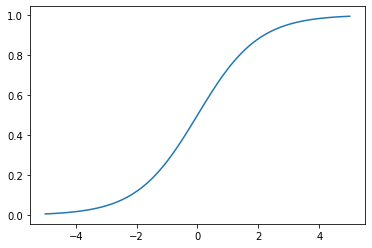

In [29]:
_x = np.linspace(-5,5,100)
#Función Sigmoide
plt.plot(_x,sign[0](_x))

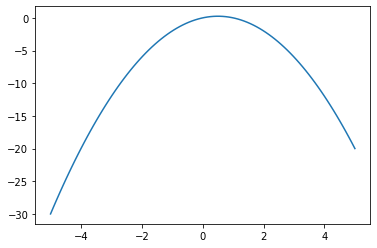

In [30]:
#Derivada de la función Sigmoide
plt.plot(_x,sign[1](_x))

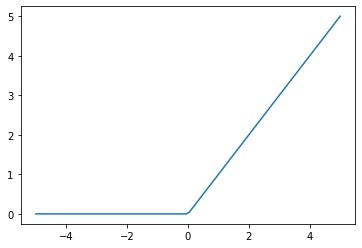

In [31]:
#Función Relu
plt.plot(_x,relu(_x))

### Creación de la Red Neuronal

In [39]:
#Esta una manera valida de crear capas pero se desea que sea iterativa
# l0 = neural_layer(p, 4, sign)
# l1 = neural_layer(4, 8, sign)
# ...

In [40]:
def create_nn(topology, act_f):
    nn = []
    for i, layer in enumerate(topology[:-1]):
        nn.append(neural_layer(topology[i], topology[i + 1], act_f))
    return nn

In [41]:
#topologia de la red, nuimero de neuronas de la red por capa, la última capa es 1 porque el resultado que queremos es binario
topology = [p, 4, 8, 16, 8, 4, 1]
#Función de coste, Error Cuadratico medio
l2_cost = (lambda yp, yr: np.mean((yp - yr) ** 2),
           lambda yp, yr: (yp - yr))
neural_net = create_nn(topology, sign)

In [42]:
print(neural_net)

[<__main__.neural_layer object at 0x0000026F55E9B888>, <__main__.neural_layer object at 0x0000026F55A12FC8>, <__main__.neural_layer object at 0x0000026F55A128C8>, <__main__.neural_layer object at 0x0000026F55A12D48>, <__main__.neural_layer object at 0x0000026F559F0288>, <__main__.neural_layer object at 0x0000026F55DC1108>]


### Función de Entrenamiento

In [57]:
def train(neural_net, x, y, l2_cost, lr = 0.5):
    out = [(None, x)]
    #Forward pass
    for l, layer in enumerate(neural_net):
        z = out[-1][1 ] @ neural_net[l].w + neural_net[l].b
        a = neural_net[l].act_f[0](z)
        out.append((z, a))
    #print(out[-1][1])
    print(l2_cost[0](out[-1][1],y))

In [56]:
train(neural_net, x, y, l2_cost, 0.5)

0.3181300458618124
